Aplicação da Regressão Linear (Mercado Financeiro)

In [323]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

In [324]:
ticker = "BBAS3.SA"
data = yf.Ticker(ticker).history(period="2y")

del data["Dividends"]
del data["Stock Splits"]

data.dropna()

data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-04 00:00:00-03:00,14.357674,14.409709,14.223246,14.327319,10339200
2022-07-05 00:00:00-03:00,14.253600,14.318646,14.023774,14.249265,17375800
2022-07-06 00:00:00-03:00,14.171212,14.344667,13.963067,14.158203,21683600
2022-07-07 00:00:00-03:00,14.288293,14.479092,14.288293,14.366347,19425200
2022-07-08 00:00:00-03:00,14.383692,14.587501,14.335993,14.505111,17998200


In [325]:
# Definindo correlação 

correlacao = pd.DataFrame(data)

correlacao_aplicada = correlacao.corr()

# Definindo X e y
X = data['Open'].values
y = data['High'].values

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

correlacao_aplicada

,Open,High,Low,Close,Volume
Open,1.000000,0.999058,0.998920,0.997740,-0.377714
High,0.999058,1.000000,0.998927,0.999061,-0.364562
Low,0.998920,0.998927,1.000000,0.999113,-0.388646
Close,0.997740,0.999061,0.999113,1.000000,-0.374973
Volume,-0.377714,-0.364562,-0.388646,-0.374973,1.000000


Text(0, 0.5, 'High')

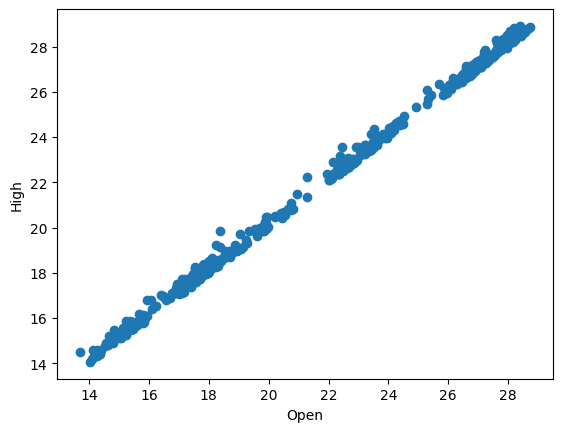

In [326]:
# Mostrar o espalhamento dos dados

plt.scatter(X, y)
plt.xlabel('Open')
plt.ylabel('High')

In [327]:
# Treinamento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [328]:
# Normalizando os dados

x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.fit_transform(X_test)
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.fit_transform(y_test)

In [329]:
# Calculo da Regressão Linear

modelo_regressao = LinearRegression()

modelo_regressao.fit(X_train, y_train)

LinearRegression()

In [330]:
# Realizar Previsões

y_pred = modelo_regressao.predict(X_test)
y_pred

array([[16.48930392],
       [23.64362195],
       [22.71597083],
       [27.52393014],
       [24.62442308],
       [15.24584363],
       [28.8213878 ],
       [22.33372348],
       [19.1060346 ],
       [18.03371809],
       [23.74151247],
       [23.83008309],
       [22.87217037],
       [28.25205775],
       [18.38819224],
       [22.49102373],
       [27.47538946],
       [27.88035102],
       [17.77671635],
       [18.36329606],
       [19.96135417],
       [26.6752399 ],
       [23.78346867],
       [15.95376429],
       [18.93992283],
       [28.01420142],
       [15.74196951],
       [28.15497378],
       [15.41126507],
       [21.51650879],
       [27.86372299],
       [15.45041074],
       [15.77388002],
       [18.24150853],
       [26.6272274 ],
       [26.31881403],
       [23.11976933],
       [26.91230329],
       [22.72742282],
       [23.57369686],
       [23.45307685],
       [17.81701619],
       [27.34917898],
       [20.17576506],
       [18.62793077],
       [14

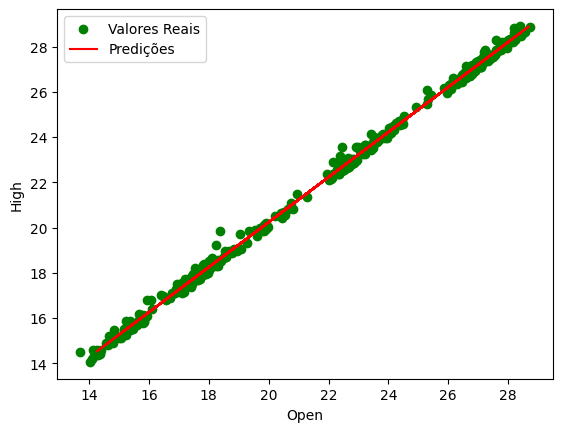

In [331]:
# Grafico Valores Reais x Predições
plt.scatter(X_train, y_train, color='green', label='Valores Reais')
plt.plot(X_test, y_pred, color='red', label='Predições')
plt.xlabel('Open')
plt.ylabel('High')
plt.legend()
plt.show()

In [332]:
# Calculando métricas de avaliação usando os valores na escala original

r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Exibindo as métricas
print(f"Coeficiente de Determinação (R2): {r2}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape}% \n")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")

Coeficiente de Determinação (R2): 0.9978285345758858
Erro Percentual Absoluto Médio (MAPE): 0.7312580673374616% 

Erro Médio Absoluto (MAE): 0.15642233216700271
Erro Quadrático Médio (MSE): 0.04147189427702901
